In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import scipy as sp
import faraway.utils

In [4]:
import faraway.datasets.tvdoctor
tvdoctor = faraway.datasets.tvdoctor.load()
print(tvdoctor.shape)
tvdoctor.head()

(38, 3)


,life,tv,doctor
0,70.5,4.0,370
1,53.5,315.0,6166
2,65.0,4.0,684
3,76.5,1.7,449
4,70.0,8.0,643


In [3]:
print(faraway.datasets.tvdoctor.DESCR)


     Life expectancy, doctors and televisions collected on 38 countries
     in 1993

Variables:

     ‘life’ Life expectancy in years

     ‘tv’ Number of people per television set

     ‘doctor’ Number of people per doctor

Source:

     Unknown, data for illustration purposes only




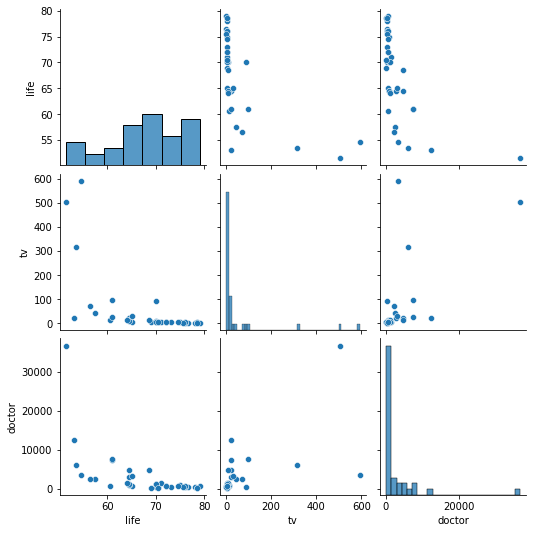

In [5]:
sns.pairplot(data=tvdoctor)

In [6]:
tvdoctor.corr()["life"].sort_values(ascending=False)

life      1.000000
doctor   -0.587480
tv       -0.605847
Name: life, dtype: float64

<AxesSubplot:xlabel='tv', ylabel='life'>

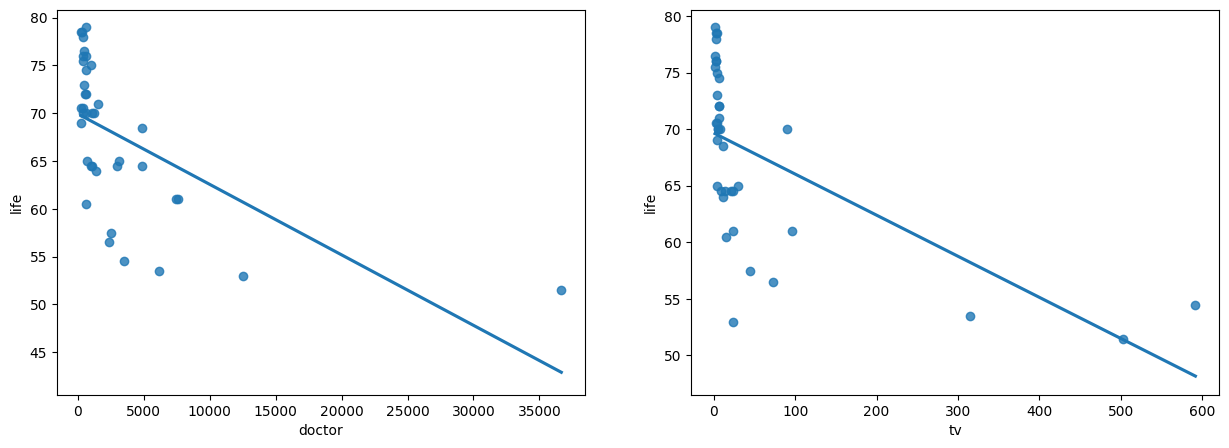

In [19]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.regplot(y="life", x="doctor", data=tvdoctor, ax=ax[0], ci=False)
sns.regplot(y="life", x="tv", data=tvdoctor, ax=ax[1], ci=False)

In [22]:
lmod = smf.ols(
    "life ~ doctor + tv",
    data=tvdoctor
).fit()
lmod.sumary()

           coefs stderr tvalues pvalues
Intercept 70.252  1.088   64.59  0.0000
doctor    -0.000  0.000   -2.14  0.0398
tv        -0.023  0.010   -2.44  0.0201

n=38 p=3 Residual SD=6.003 R-squared=0.44


In [20]:
%run utils.ipynb

(<Figure size 2000x1000 with 2 Axes>,
 array([<AxesSubplot:xlabel='doctor', ylabel='e.hat'>,
        <AxesSubplot:xlabel='tv', ylabel='e.hat'>], dtype=object))

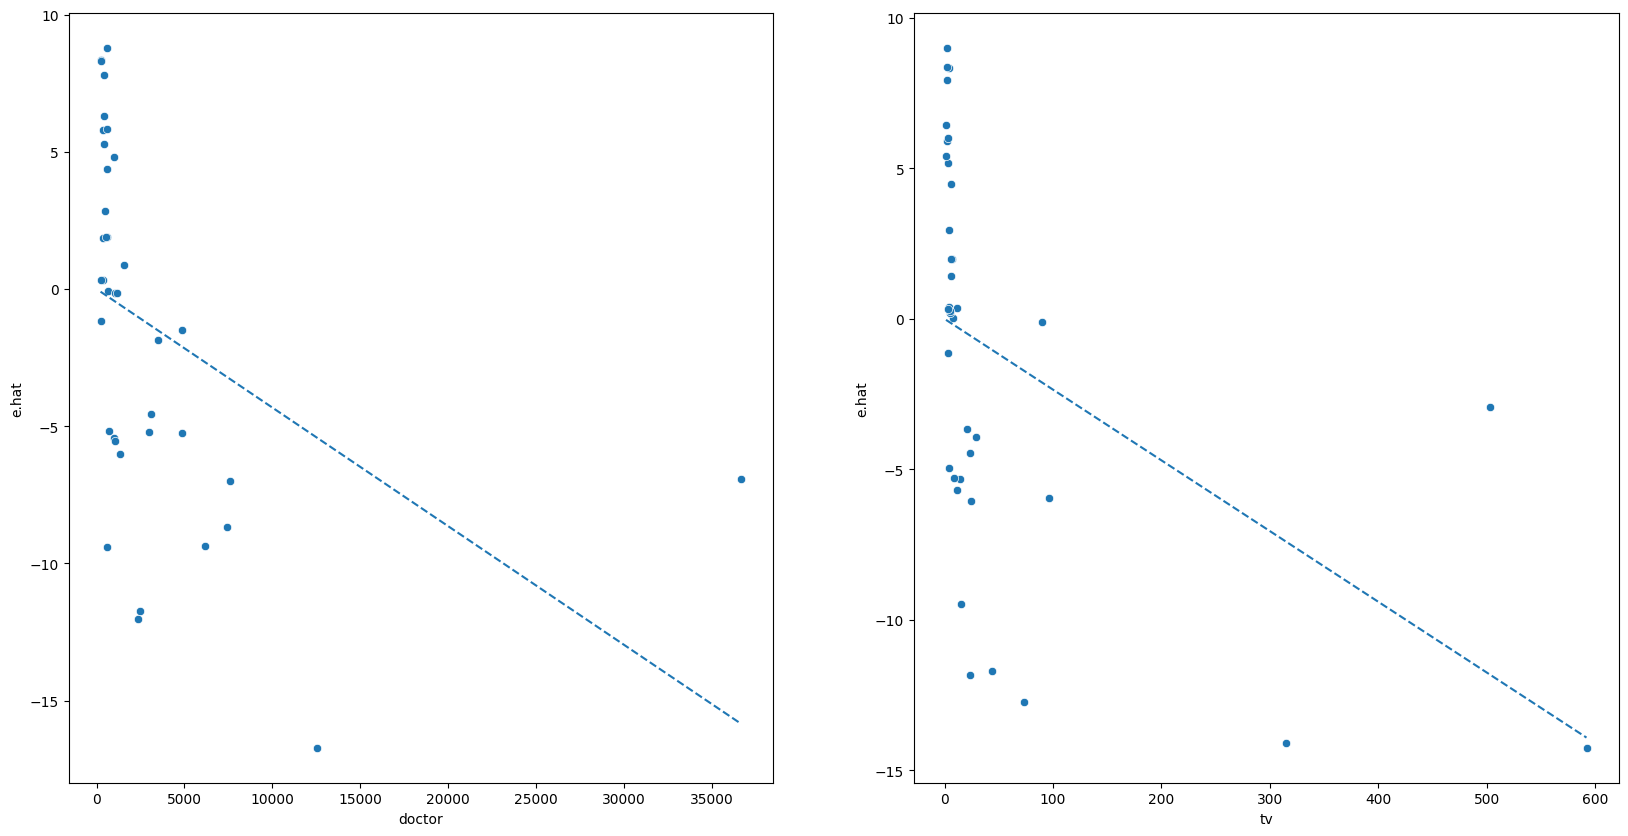

In [24]:
partial_residuals_plot(lmod)

(<Figure size 2000x1000 with 2 Axes>,
 array([<AxesSubplot:xlabel='doctor', ylabel='e.hat'>,
        <AxesSubplot:xlabel='tv', ylabel='e.hat'>], dtype=object))

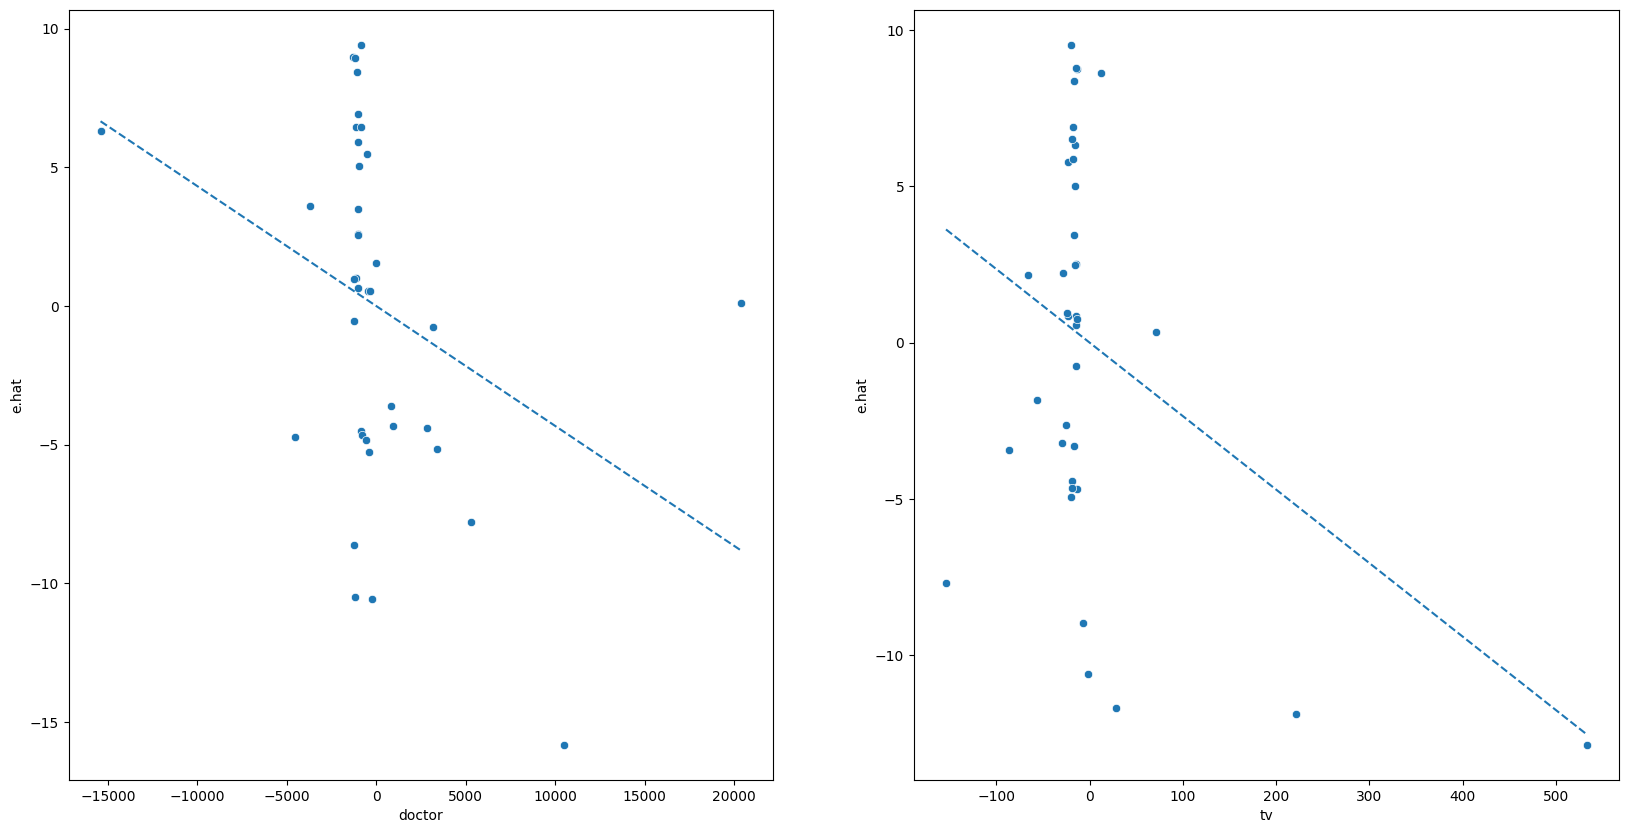

In [27]:
partial_regression_plot(lmod)

<AxesSubplot:xlabel='ltv', ylabel='life'>

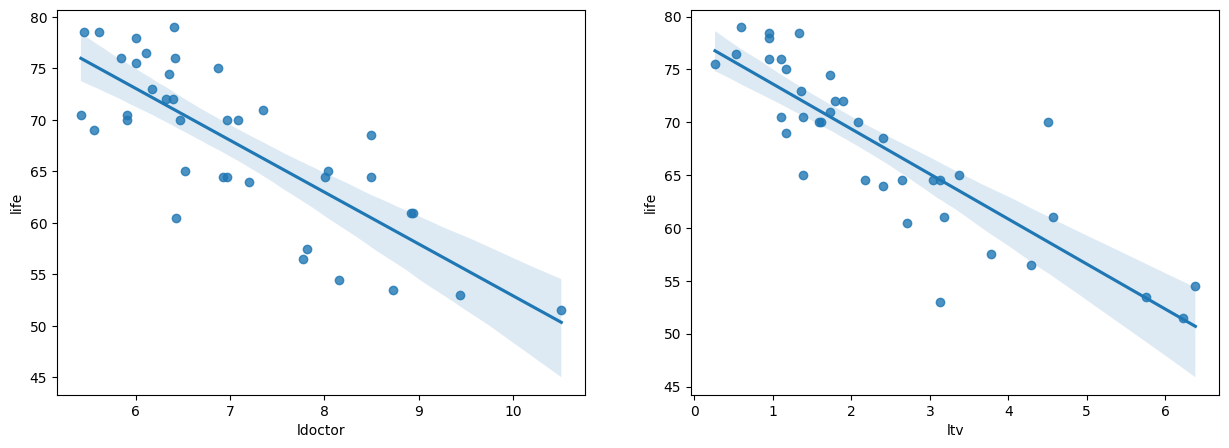

In [16]:
f, ax = plt.subplots(1, 2, figsize=(15, 5))
tvdoctor["ldoctor"] = np.log(tvdoctor["doctor"])
tvdoctor["ltv"] = np.log(tvdoctor["tv"])

sns.regplot(y="life", x="ldoctor", data=tvdoctor, ax=ax[0])
sns.regplot(y="life", x="ltv", data=tvdoctor, ax=ax[1])

In [17]:
tvdoctor.corr()["life"].sort_values(ascending=False)

life       1.000000
doctor    -0.587480
tv        -0.605847
ldoctor   -0.799043
ltv       -0.855113
Name: life, dtype: float64

In [25]:
lmod_log = smf.ols(
    "life ~ ltv + ldoctor",
    data=tvdoctor
).fit()
lmod_log.sumary()

           coefs stderr tvalues pvalues
Intercept 90.622  4.356   20.81  0.0000
ltv       -2.916  0.591   -4.94  0.0000
ldoctor   -2.259  0.747   -3.02  0.0047

n=38 p=3 Residual SD=3.704 R-squared=0.79


(<Figure size 2000x1000 with 2 Axes>,
 array([<AxesSubplot:xlabel='ltv', ylabel='e.hat'>,
        <AxesSubplot:xlabel='ldoctor', ylabel='e.hat'>], dtype=object))

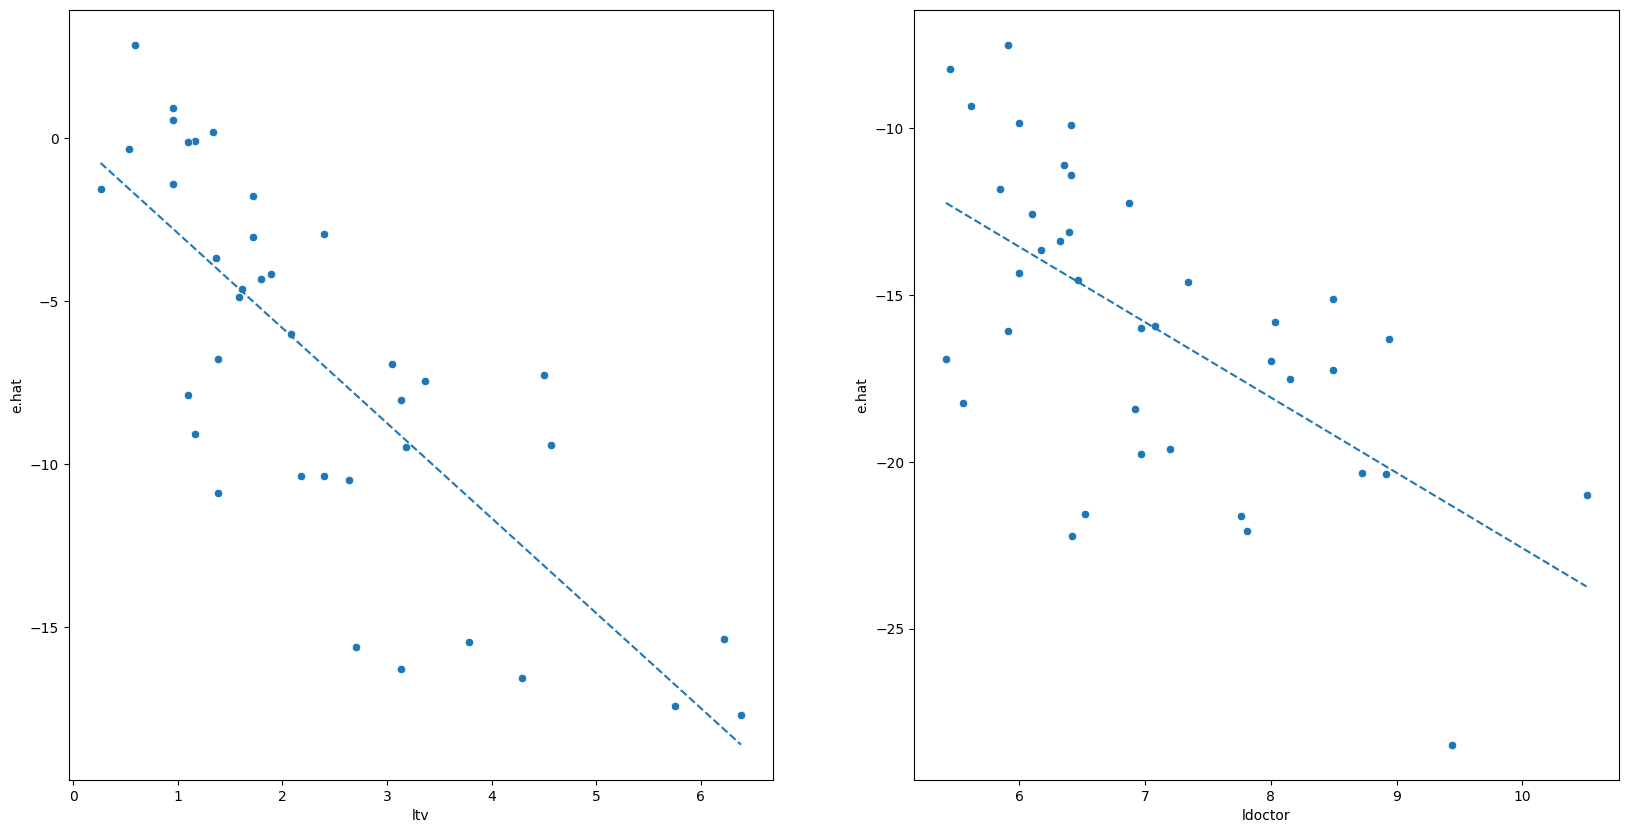

In [26]:
partial_residuals_plot(lmod_log)

(<Figure size 2000x1000 with 2 Axes>,
 array([<AxesSubplot:xlabel='ltv', ylabel='e.hat'>,
        <AxesSubplot:xlabel='ldoctor', ylabel='e.hat'>], dtype=object))

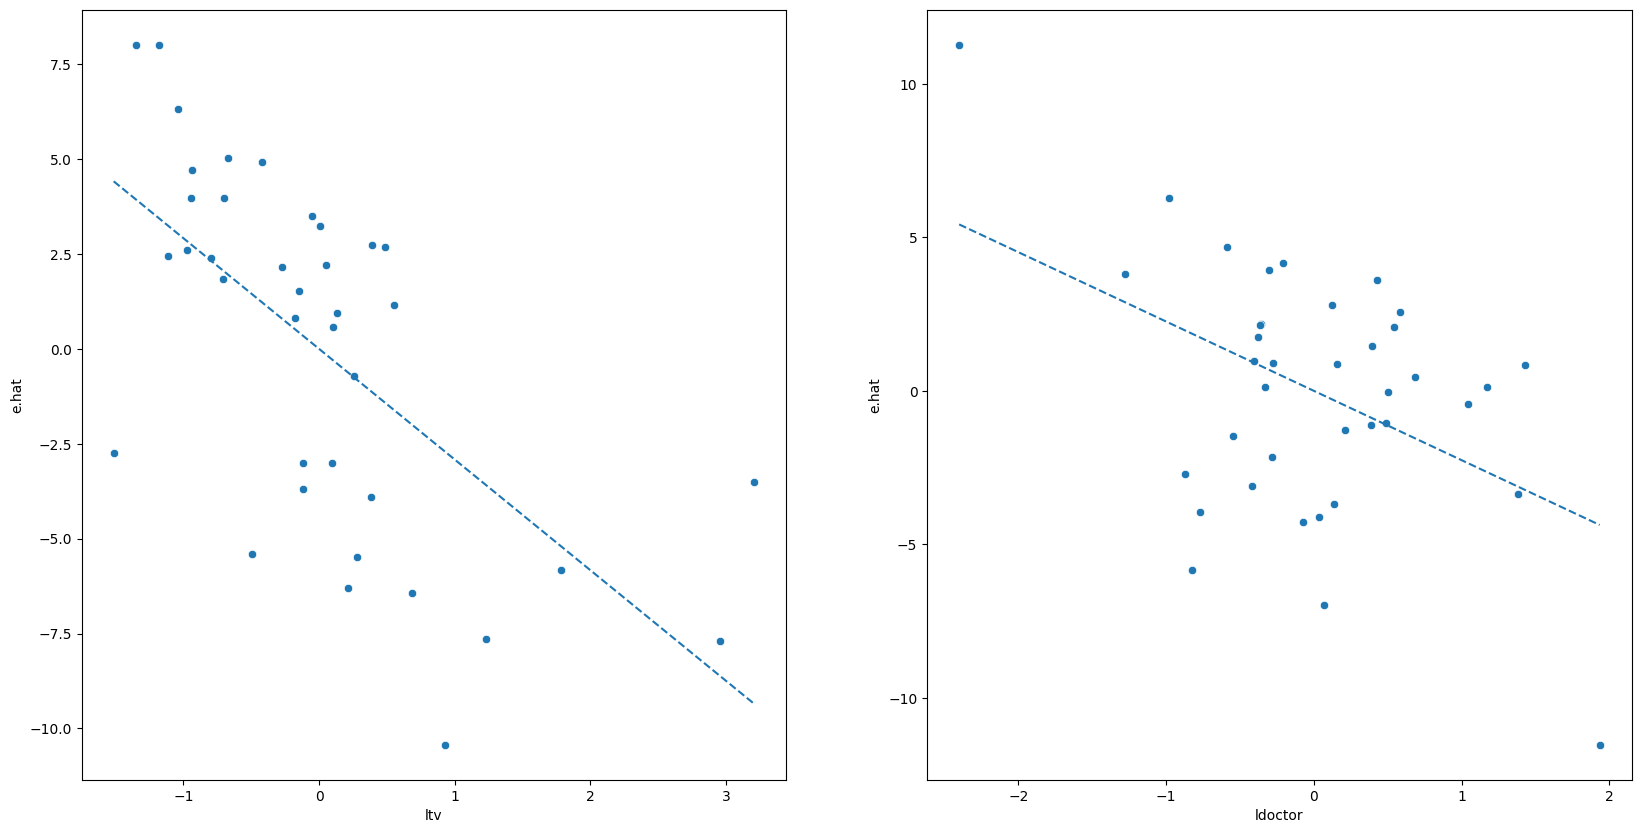

In [29]:
partial_regression_plot(lmod_log)